In [12]:
import pandas as pd

In [ ]:
files = ['data/cell_towers_MX.csv', 'data/cell_towers_ZA.csv', 'data/cell_towers_THA.csv']

# Read and concatenate them
merged_df = pd.concat([pd.read_csv(file) for file in files])

# Save to a new CSV
merged_df.to_csv('merged_file.csv', index=False)

In [14]:
df = pd.read_csv('data/merged_file.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283769 entries, 0 to 283768
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   radio          283769 non-null  object 
 1   mcc            283769 non-null  int64  
 2   net            283769 non-null  int64  
 3   area           283769 non-null  int64  
 4   cell           283769 non-null  int64  
 5   unit           283769 non-null  int64  
 6   lon            283769 non-null  float64
 7   lat            283769 non-null  float64
 8   range          283769 non-null  int64  
 9   samples        283769 non-null  int64  
 10  changeable     283769 non-null  int64  
 11  averageSignal  283769 non-null  int64  
 12  created_utc    283769 non-null  object 
 13  updated_utc    283769 non-null  object 
 14  created_date   283769 non-null  object 
 15  updated_date   283769 non-null  object 
dtypes: float64(2), int64(9), object(5)
memory usage: 34.6+ MB


In [16]:
# Map MCCs to country names
mcc_map = {520: "Thailand", 334: "Mexico", 655: "South Africa"}
df["country"] = df["mcc"].map(mcc_map)

In [17]:
# Count unique towers per country
tower_counts = df.groupby("country")["cell"].nunique().reset_index(name="tower_count")
tower_counts

,country,tower_count
0,Mexico,117144
1,South Africa,27742
2,Thailand,32738


In [19]:
# Approximate land areas in km²
land_area = {"Thailand": 513120, "Mexico": 1972550, "South Africa": 1221037}
tower_counts["land_area_km2"] = tower_counts["country"].map(land_area)
tower_counts["towers_per_1000_km2"] = (tower_counts["tower_count"] / tower_counts["land_area_km2"]) * 1000

In [21]:
tower_counts

,country,tower_count,land_area_km2,towers_per_1000_km2
0,Mexico,117144,1972550,59.387088
1,South Africa,27742,1221037,22.720032
2,Thailand,32738,513120,63.801840


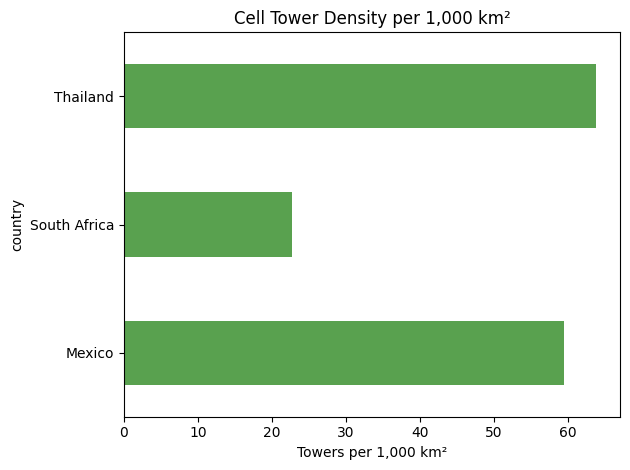

In [20]:
import matplotlib.pyplot as plt

tower_counts.set_index("country")["towers_per_1000_km2"].plot(
    kind="barh", color="#59a14f", title="Cell Tower Density per 1,000 km²"
)
plt.xlabel("Towers per 1,000 km²")
plt.tight_layout()
plt.show()